c:\Python\Lib\site-packages\statsforecast\core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


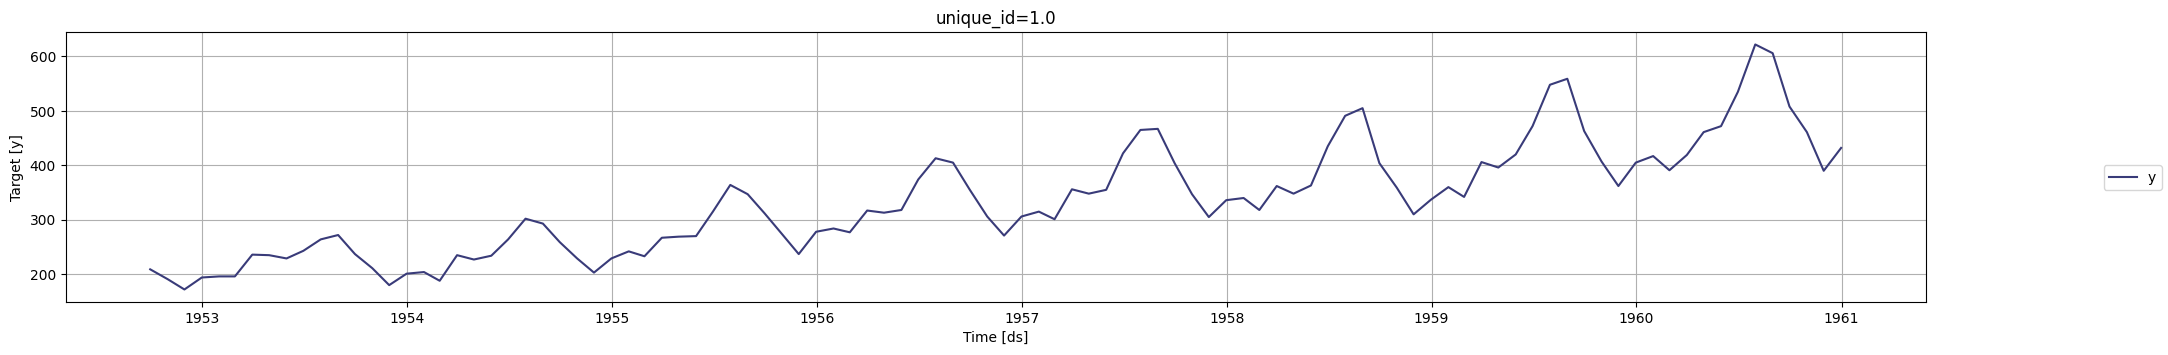

In [2]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.utils import AirPassengersDF
from statsforecast.models import AutoETS
from statsforecast.utils import AirPassengers as ap

df = AirPassengersDF
StatsForecast.plot(df, plot_random = False, max_insample_length = 100)

In [4]:
sf = StatsForecast(
    models = [AutoARIMA(season_length = 12)],
    freq = 'M'
)
sf.fit(df)
forecast_df = sf.predict(h=120, level=[90])
print(type(sf)) 

<class 'statsforecast.core.StatsForecast'>


c:\Python\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [9]:
sf.plot(df, forecast_df, level=[90])
forecast_df

c:\Python\Lib\site-packages\statsforecast\core.py:1325: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
unique_id,,,,
1.0,1961-01-31,444.300049,424.971436,463.628693
1.0,1961-02-28,418.210022,394.616974,441.803070
1.0,1961-03-31,446.237030,418.134003,474.340057
1.0,1961-04-30,488.228943,456.491608,519.966248
1.0,1961-05-31,499.231354,464.168854,534.293884
...,...,...,...,...
1.0,1970-08-31,878.307983,-90.527435,1847.143433
1.0,1970-09-30,780.307983,-199.868866,1760.484863
1.0,1970-10-31,733.307983,-258.080536,1724.696533


In [11]:
# AutoETS' usage example

# Multiplicative trend, optimal error and seasonality
autoets = AutoETS(model='ZMZ',  
              season_length=4)
autoets = autoets.fit(y=ap)
y_hat_dict = autoets.predict(h=12, level=[90])
y_hat_dict

{'mean': array([416.63294737, 419.65915384, 442.66309931, 457.33314074,
        441.06595156, 444.26962675, 468.62261458, 484.15296528,
        466.93180378, 470.32335515, 496.10449852, 512.54561043]),
 'lo-90': array([346.44736795, 349.47267438, 285.11632556, 240.95392299,
        224.68645787, 227.88982813, 208.62248709, 183.19175481,
        165.97038601, 169.3617084 , 161.01924211, 143.38190407]),
 'hi-90': array([486.81852679, 489.84563331, 600.20987305, 673.7123585 ,
        657.44544525, 660.64942538, 728.62274207, 785.11417575,
        767.89322154, 771.28500191, 831.18975494, 881.70931678])}